In [23]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import time
import numpy as np
import pandas as pd

In [25]:
haircare_data=pd.read_excel('./Haircare_33Attr_Reduced.xlsx')

In [3]:
haircare_data['Brand Name'].unique()

array(['Lush ME', 'Lush US', 'LBP US', 'Dr. Organic UK', 'Body Shop US',
       'Body Shop UK', 'Body Shop Can', 'Bath Body Works US',
       'Body Shop ME', 'Bath Body Works ME', 'OGX US'], dtype=object)

In [11]:
uk_us_data = haircare_data[haircare_data['Brand Name'].isin(['Lush US', 'LBP US', 'Dr. Organic UK', 'Body Shop US',
       'Body Shop UK', 'OGX US','Bath Body Works US'])]

In [19]:
uk_us_data.drop(['Brand Name'],axis=1)

,follower_id,Artistic interests,Emotionality,Authority-challenging,Cautiousness,Orderliness,Self-discipline,Self-efficacy,Activity level,Assertiveness,...,Practicality,Self-expression,Stability,Structure,Conservation,Openness to change,Hedonism,Self-enhancement,Self-transcendence,Market
1159,145968,0.490404,0.712281,0.886314,0.554314,0.258005,0.578795,0.730557,0.913690,0.868716,...,0.538994,0.534707,0.366884,0.387601,0.156773,0.778117,0.261900,0.790773,0.483847,US
1160,145969,0.828898,0.668709,0.980057,0.242359,0.043061,0.024375,0.124177,0.205467,0.578431,...,0.131695,0.328946,0.177971,0.094604,0.006753,0.362393,0.309622,0.160503,0.625064,US
1161,145970,0.867472,0.550965,0.688967,0.358810,0.789150,0.554684,0.239732,0.758500,0.540628,...,0.904486,0.928713,0.808848,0.526045,0.210261,0.849415,0.507734,0.554637,0.604406,US
1162,145971,0.740608,0.862578,0.877163,0.614829,0.036289,0.264486,0.122498,0.361551,0.180951,...,0.131645,0.304565,0.389559,0.146498,0.231426,0.510870,0.540242,0.580246,0.841993,US
1163,145972,0.648221,0.910051,0.756019,0.516210,0.145911,0.393964,0.292985,0.419572,0.191307,...,0.294380,0.490787,0.634646,0.364310,0.592285,0.536803,0.616651,0.367152,0.917113,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52763,145963,0.759209,0.859887,0.288054,0.652031,0.928094,0.796627,0.369474,0.604653,0.324319,...,0.008641,0.420608,0.815491,0.032681,0.711368,0.346688,0.685722,0.309036,0.413073,US
52764,145964,0.539466,0.840484,0.611691,0.972684,0.818830,0.955924,0.716445,0.934780,0.955556,...,0.632076,0.807342,0.900410,0.282767,0.267489,0.123144,0.094977,0.794638,0.356777,US
52765,145965,0.538593,0.521771,0.046771,0.962862,0.881486,0.970442,0.127878,0.967300,0.648598,...,0.397707,0.713780,0.617069,0.305283,0.558728,0.241426,0.067009,0.370442,0.312886,US
52766,145966,0.697494,0.950109,0.542723,0.584420,0.128247,0.510685,0.007338,0.081243,0.082802,...,0.092113,0.602638,0.688060,0.051334,0.444943,0.260210,0.589997,0.271103,0.687502,US


In [13]:
uk_us_data[uk_us_data['Brand Name'].isin(['Dr. Organic UK','Body Shop UK'])]['Market'] = 'UK'
uk_us_data[uk_us_data['Brand Name'].isin(['OGX US','Lush US','LBP US','Body Shop US','Bath Body Works US'])]['Market'] = 'US'

C:\Users\Arunabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Arunabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
uk_us_data.loc[uk_us_data['Brand Name'].isin(['Dr. Organic UK','Body Shop UK']), 'Market'] = "UK"
uk_us_data.loc[uk_us_data['Brand Name'].isin(['OGX US','Lush US','LBP US','Body Shop US','Bath Body Works US']), 'Market'] = "US"

C:\Users\Arunabh\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Arunabh\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


brands analyzed are ['UK', 'US']



total brands are 2
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 35821 samples in 0.143s...
[t-SNE] Computed neighbors for 35821 samples in 213.689s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35821
[t-SNE] Computed conditional probabilities for sample 2000 / 35821
[t-SNE] Computed conditional probabilities for sample 3000 / 35821
[t-SNE] Computed conditional probabilities for sample 4000 / 35821
[t-SNE] Computed conditional probabilities for sample 5000 / 35821
[t-SNE] Computed conditional probabilities for sample 6000 / 35821
[t-SNE] Computed conditional probabilities for sample 7000 / 35821
[t-SNE] Computed conditional probabilities for sample 8000 / 35821
[t-SNE] Computed conditional probabilities for sample 9000 / 35821
[t-SNE] Computed conditional probabilities for sample 10000 / 35821
[t-SNE] Computed conditional probabilities for sample 11000 / 35821
[t-SNE] Computed conditional probabilities for sample 12000 

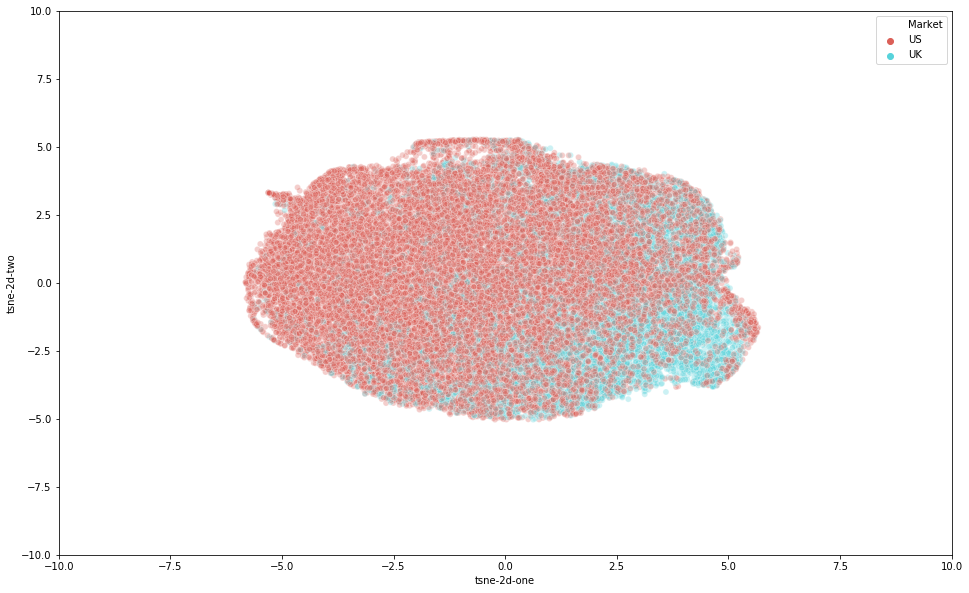

In [22]:
plot_tsne(df=uk_us_data.drop(['Brand Name'],axis=1),column='Market',file_name='uk_us_tsne',brand_list=['UK','US'])

In [5]:
X=haircare_data.iloc[:,1:-1]
y=haircare_data['Brand Name']

In [6]:
####
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 52768 samples in 0.305s...
[t-SNE] Computed neighbors for 52768 samples in 418.939s...
[t-SNE] Computed conditional probabilities for sample 1000 / 52768
[t-SNE] Computed conditional probabilities for sample 2000 / 52768
[t-SNE] Computed conditional probabilities for sample 3000 / 52768
[t-SNE] Computed conditional probabilities for sample 4000 / 52768
[t-SNE] Computed conditional probabilities for sample 5000 / 52768
[t-SNE] Computed conditional probabilities for sample 6000 / 52768
[t-SNE] Computed conditional probabilities for sample 7000 / 52768
[t-SNE] Computed conditional probabilities for sample 8000 / 52768
[t-SNE] Computed conditional probabilities for sample 9000 / 52768
[t-SNE] Computed conditional probabilities for sample 10000 / 52768
[t-SNE] Computed conditional probabilities for sample 11000 / 52768
[t-SNE] Computed conditional probabilities for sample 12000 / 52768
[t-SNE] Computed conditional probabilities for 

In [24]:
haircare_data['Market']

0        Middle East
1        Middle East
2        Middle East
3        Middle East
4        Middle East
            ...     
52763             US
52764             US
52765             US
52766             US
52767             US
Name: Market, Length: 52768, dtype: object

In [26]:
haircare_data.loc[haircare_data['Brand Name'].isin(['Lush ME', 'Body Shop ME', 'Bath Body Works ME']), 'Market'] = "Middle East"

haircare_data.loc[haircare_data['Brand Name'].isin(['Lush US', 'LBP US', 'Body Shop US','Body Shop Can', 'Bath Body Works US','OGX US']), 'Market'] = "US"

haircare_data.loc[haircare_data['Brand Name'].isin(['Dr. Organic UK','Body Shop UK']), 'Market'] = "UK"


In [27]:
haircare_data[haircare_data['Brand Name'].isin(['Lush ME', 'Body Shop ME', 'Bath Body Works ME'])]['Market'] = 'Middle East'
haircare_data[haircare_data['Brand Name'].isin(['Lush US', 'LBP US', 'Body Shop US','Body Shop Can', 'Bath Body Works US','OGX US'])]['Market'] = 'US'
haircare_data[haircare_data['Brand Name'].isin(['Dr. Organic UK','Body Shop UK'])]['Market'] = 'UK'

C:\Users\Arunabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Arunabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Arunabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [20]:
haircare_data['Market']

0         
1         
2         
3         
4         
        ..
52763     
52764     
52765     
52766     
52767     
Name: Market, Length: 52768, dtype: object

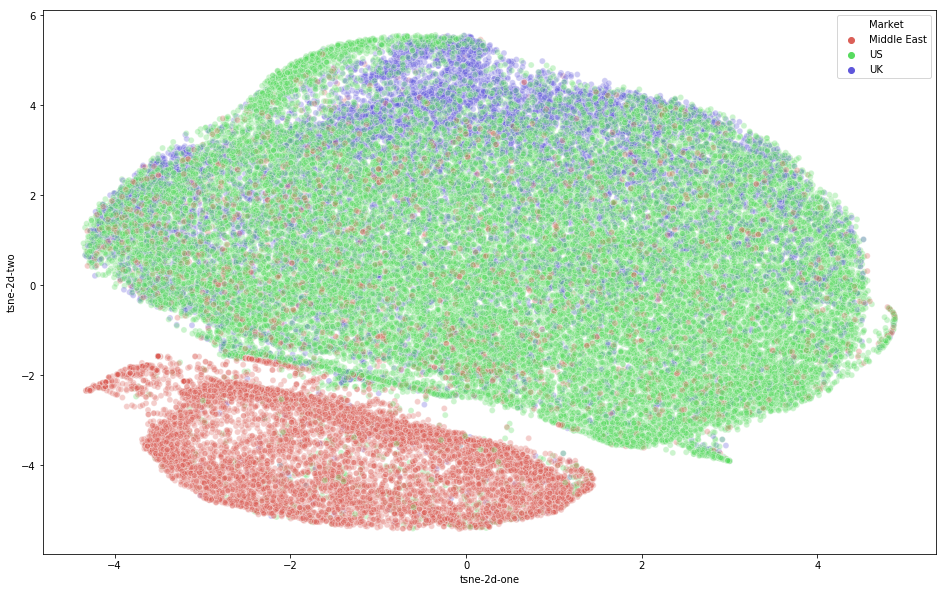

In [27]:
haircare_data['tsne-2d-one'] = tsne_results[:,0]
haircare_data['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Market",
    palette=sns.color_palette("hls",3 ),
    data=haircare_data,
    legend="full",
    alpha=0.3)
plt.savefig('./us_me_uk_tsne.png')

In [26]:
#plt.xlim()

<Figure size 432x288 with 0 Axes>

#### tsne for BBW US and BBW ME

In [29]:
haircare_data['Brand Name'].unique()

array(['Lush US', 'LBP US', 'Dr. Organic UK', 'Body Shop US',
       'Body Shop UK', 'Body Shop Can', 'Bath Body Works US', 'OGX US',
       'Lush ME', 'Body Shop ME', 'Bath Body Works ME'], dtype=object)

In [30]:
haircare_data['Market'].unique()

array(['US', 'UK', 'Middle East'], dtype=object)

In [29]:
bbw_tsne_df = haircare_data[haircare_data['Brand Name'].isin(['Bath Body Works ME','Bath Body Works US'])]

False

In [38]:
def plot_tsne(df=None, column='Brand Name',file_name='1', brand_list=['Body Shop UK', 'Body Shop Can', 'Bath Body Works US','Body Shop ME', 'Bath Body Works ME', 'OGX US']):
    df = df[df[column].isin(brand_list)]
    if 'Market' in df.columns.tolist():
        X=df.iloc[:,1:-2]
    else:
        X=df.iloc[:,1:-1]
    y=df[column]
    #print(X.head())
    print('brands analyzed are ' + str(brand_list))
    print('\n\n')
    print('total brands are '+str(len(y.unique().tolist())))
    
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(X)
    
    df['tsne-2d-one'] = tsne_results[:,0]
    df['tsne-2d-two'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    plt.xlim([-10,10])
    plt.ylim([-10,10])
    sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=column,palette=sns.color_palette("hls",len(y.unique().tolist()) ),data=df,legend="full",alpha=0.3)
    plt.savefig('./'+file_name+'.png')

In [33]:
haircare_data

,follower_id,Artistic interests,Emotionality,Authority-challenging,Cautiousness,Orderliness,Self-discipline,Self-efficacy,Activity level,Assertiveness,...,Self-expression,Stability,Structure,Conservation,Openness to change,Hedonism,Self-enhancement,Self-transcendence,Brand Name,Market
0,145968,0.490404,0.712281,0.886314,0.554314,0.258005,0.578795,0.730557,0.913690,0.868716,...,0.534707,0.366884,0.387601,0.156773,0.778117,0.261900,0.790773,0.483847,Lush US,US
1,145969,0.828898,0.668709,0.980057,0.242359,0.043061,0.024375,0.124177,0.205467,0.578431,...,0.328946,0.177971,0.094604,0.006753,0.362393,0.309622,0.160503,0.625064,Lush US,US
2,145970,0.867472,0.550965,0.688967,0.358810,0.789150,0.554684,0.239732,0.758500,0.540628,...,0.928713,0.808848,0.526045,0.210261,0.849415,0.507734,0.554637,0.604406,Lush US,US
3,145971,0.740608,0.862578,0.877163,0.614829,0.036289,0.264486,0.122498,0.361551,0.180951,...,0.304565,0.389559,0.146498,0.231426,0.510870,0.540242,0.580246,0.841993,Lush US,US
4,145972,0.648221,0.910051,0.756019,0.516210,0.145911,0.393964,0.292985,0.419572,0.191307,...,0.490787,0.634646,0.364310,0.592285,0.536803,0.616651,0.367152,0.917113,Lush US,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44842,171799,0.337377,0.774599,0.803264,0.899459,0.145325,0.536689,0.069144,0.171906,0.128657,...,0.150839,0.110336,0.115753,0.423653,0.089201,0.408670,0.310960,0.454115,Bath Body Works ME,Middle East
44843,171801,0.288629,0.499629,0.070038,0.636623,0.710518,0.586874,0.573871,0.506114,0.558157,...,0.245785,0.218315,0.500000,0.685799,0.383206,0.336437,0.500000,0.299376,Bath Body Works ME,Middle East
44844,171808,0.720312,0.581276,0.029850,0.551477,0.914139,0.893997,0.579335,0.969749,0.920550,...,0.734979,0.825416,0.500000,0.778119,0.951089,0.222531,0.500000,0.846050,Bath Body Works ME,Middle East
44845,171877,0.450626,0.674070,0.704323,0.321218,0.321685,0.412475,0.294967,0.321544,0.402395,...,0.464980,0.432809,0.500000,0.340513,0.797946,0.527162,0.500000,0.661999,Bath Body Works ME,Middle East


brands analyzed are ['Lush US', 'Lush ME']



total brands are 2
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5472 samples in 0.013s...
[t-SNE] Computed neighbors for 5472 samples in 4.645s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5472
[t-SNE] Computed conditional probabilities for sample 2000 / 5472
[t-SNE] Computed conditional probabilities for sample 3000 / 5472
[t-SNE] Computed conditional probabilities for sample 4000 / 5472
[t-SNE] Computed conditional probabilities for sample 5000 / 5472
[t-SNE] Computed conditional probabilities for sample 5472 / 5472
[t-SNE] Mean sigma: 0.356369
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.225464
[t-SNE] KL divergence after 300 iterations: 2.570309


C:\Users\Arunabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Arunabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


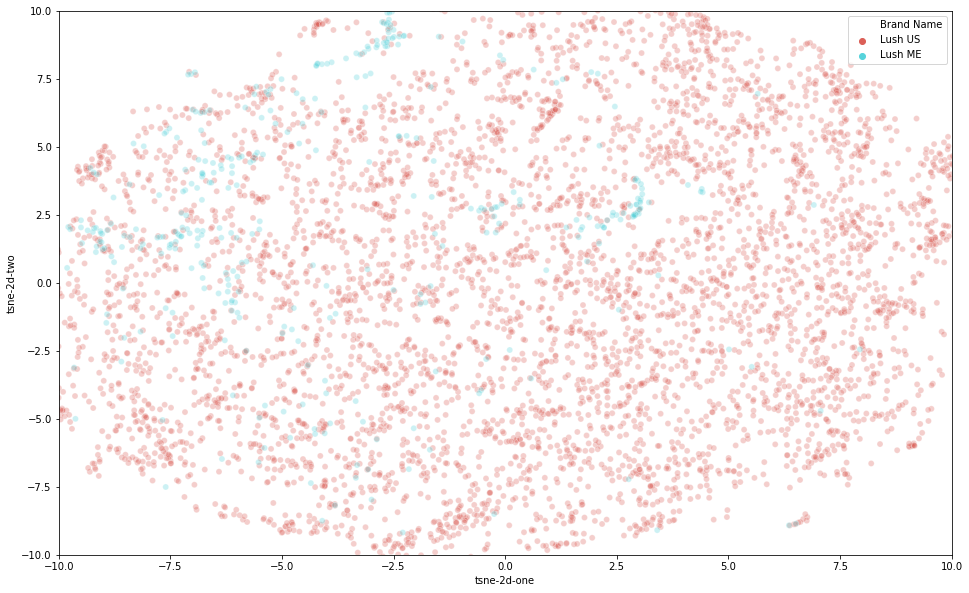

In [41]:
plot_tsne(df=haircare_data,file_name='lush_tsne',brand_list=['Lush US','Lush ME'])

#### LBP US vs LBP ME lookalikes

In [42]:
lbp_us = haircare_data[haircare_data['Brand Name']=='LBP US']

In [43]:
lbp_me = pd.read_excel('./top_lbp_lookalikes_me.xlsx')

In [44]:
#lbp_me = lbp_me.iloc[:,1:-3]

In [45]:
lbp_me['Brand Name']='LBP ME'

In [46]:
lbp_me

,follower_id,Artistic interests,Emotionality,Authority-challenging,Cautiousness,Orderliness,Self-discipline,Self-efficacy,Activity level,Assertiveness,...,Practicality,Self-expression,Stability,Structure,Conservation,Openness to change,Hedonism,Self-enhancement,Self-transcendence,Brand Name
0,160959,0.853649,0.861950,0.869055,0.477364,0.223401,0.133536,0.256075,0.328531,0.301239,...,0.431382,0.617193,0.398927,0.235624,0.379915,0.772777,0.553753,0.627985,0.765279,LBP ME
1,170586,0.870458,0.958020,0.396846,0.155029,0.194518,0.114616,0.192708,0.283281,0.391067,...,0.343825,0.831866,0.842188,0.386043,0.565883,0.886309,0.554732,0.595537,0.880037,LBP ME
2,160883,0.646690,0.893466,0.444586,0.108806,0.139751,0.174600,0.123842,0.271111,0.312735,...,0.458364,0.702818,0.702513,0.098247,0.459268,0.911781,0.874857,0.884739,0.906936,LBP ME
3,161415,0.911691,0.975279,0.942152,0.687837,0.076832,0.367852,0.175703,0.687032,0.197853,...,0.176934,0.561494,0.565549,0.286740,0.309878,0.813362,0.473215,0.690785,0.892229,LBP ME
4,155612,0.918411,0.873999,0.957373,0.271746,0.227147,0.157518,0.233529,0.197879,0.116853,...,0.500000,0.832865,0.588826,0.500000,0.190151,0.916570,0.489291,0.500000,0.851258,LBP ME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,160155,0.940157,0.769437,0.570600,0.347678,0.708037,0.756564,0.741294,0.676579,0.884172,...,0.500000,0.914106,0.551546,0.500000,0.287650,0.969519,0.465265,0.500000,0.934906,LBP ME
996,155863,0.367872,0.601574,0.227541,0.256606,0.884750,0.834547,0.227908,0.453752,0.014970,...,0.500000,0.586798,0.833257,0.500000,0.879419,0.717890,0.274394,0.500000,0.317583,LBP ME
997,156887,0.505201,0.574403,0.206549,0.348419,0.886498,0.797142,0.346502,0.561760,0.140668,...,0.500000,0.620557,0.566414,0.500000,0.857531,0.629414,0.182477,0.500000,0.401733,LBP ME
998,168938,0.437752,0.248434,0.229836,0.703759,0.421146,0.642929,0.577880,0.685963,0.823754,...,0.500000,0.553775,0.975937,0.500000,0.691992,0.940072,0.497190,0.500000,0.875033,LBP ME


In [52]:
lbp_me

,follower_id,Artistic interests,Emotionality,Authority-challenging,Cautiousness,Orderliness,Self-discipline,Self-efficacy,Activity level,Assertiveness,...,Practicality,Self-expression,Stability,Structure,Conservation,Openness to change,Hedonism,Self-enhancement,Self-transcendence,Brand Name
0,160959,0.853649,0.861950,0.869055,0.477364,0.223401,0.133536,0.256075,0.328531,0.301239,...,0.431382,0.617193,0.398927,0.235624,0.379915,0.772777,0.553753,0.627985,0.765279,LBP ME
1,170586,0.870458,0.958020,0.396846,0.155029,0.194518,0.114616,0.192708,0.283281,0.391067,...,0.343825,0.831866,0.842188,0.386043,0.565883,0.886309,0.554732,0.595537,0.880037,LBP ME
2,160883,0.646690,0.893466,0.444586,0.108806,0.139751,0.174600,0.123842,0.271111,0.312735,...,0.458364,0.702818,0.702513,0.098247,0.459268,0.911781,0.874857,0.884739,0.906936,LBP ME
3,161415,0.911691,0.975279,0.942152,0.687837,0.076832,0.367852,0.175703,0.687032,0.197853,...,0.176934,0.561494,0.565549,0.286740,0.309878,0.813362,0.473215,0.690785,0.892229,LBP ME
4,155612,0.918411,0.873999,0.957373,0.271746,0.227147,0.157518,0.233529,0.197879,0.116853,...,0.500000,0.832865,0.588826,0.500000,0.190151,0.916570,0.489291,0.500000,0.851258,LBP ME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,160155,0.940157,0.769437,0.570600,0.347678,0.708037,0.756564,0.741294,0.676579,0.884172,...,0.500000,0.914106,0.551546,0.500000,0.287650,0.969519,0.465265,0.500000,0.934906,LBP ME
996,155863,0.367872,0.601574,0.227541,0.256606,0.884750,0.834547,0.227908,0.453752,0.014970,...,0.500000,0.586798,0.833257,0.500000,0.879419,0.717890,0.274394,0.500000,0.317583,LBP ME
997,156887,0.505201,0.574403,0.206549,0.348419,0.886498,0.797142,0.346502,0.561760,0.140668,...,0.500000,0.620557,0.566414,0.500000,0.857531,0.629414,0.182477,0.500000,0.401733,LBP ME
998,168938,0.437752,0.248434,0.229836,0.703759,0.421146,0.642929,0.577880,0.685963,0.823754,...,0.500000,0.553775,0.975937,0.500000,0.691992,0.940072,0.497190,0.500000,0.875033,LBP ME


In [54]:
lbp_me

,follower_id,Artistic interests,Emotionality,Authority-challenging,Cautiousness,Orderliness,Self-discipline,Self-efficacy,Activity level,Assertiveness,...,Practicality,Self-expression,Stability,Structure,Conservation,Openness to change,Hedonism,Self-enhancement,Self-transcendence,Brand Name
0,160959,0.853649,0.861950,0.869055,0.477364,0.223401,0.133536,0.256075,0.328531,0.301239,...,0.431382,0.617193,0.398927,0.235624,0.379915,0.772777,0.553753,0.627985,0.765279,LBP ME
1,170586,0.870458,0.958020,0.396846,0.155029,0.194518,0.114616,0.192708,0.283281,0.391067,...,0.343825,0.831866,0.842188,0.386043,0.565883,0.886309,0.554732,0.595537,0.880037,LBP ME
2,160883,0.646690,0.893466,0.444586,0.108806,0.139751,0.174600,0.123842,0.271111,0.312735,...,0.458364,0.702818,0.702513,0.098247,0.459268,0.911781,0.874857,0.884739,0.906936,LBP ME
3,161415,0.911691,0.975279,0.942152,0.687837,0.076832,0.367852,0.175703,0.687032,0.197853,...,0.176934,0.561494,0.565549,0.286740,0.309878,0.813362,0.473215,0.690785,0.892229,LBP ME
4,155612,0.918411,0.873999,0.957373,0.271746,0.227147,0.157518,0.233529,0.197879,0.116853,...,0.500000,0.832865,0.588826,0.500000,0.190151,0.916570,0.489291,0.500000,0.851258,LBP ME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,160155,0.940157,0.769437,0.570600,0.347678,0.708037,0.756564,0.741294,0.676579,0.884172,...,0.500000,0.914106,0.551546,0.500000,0.287650,0.969519,0.465265,0.500000,0.934906,LBP ME
996,155863,0.367872,0.601574,0.227541,0.256606,0.884750,0.834547,0.227908,0.453752,0.014970,...,0.500000,0.586798,0.833257,0.500000,0.879419,0.717890,0.274394,0.500000,0.317583,LBP ME
997,156887,0.505201,0.574403,0.206549,0.348419,0.886498,0.797142,0.346502,0.561760,0.140668,...,0.500000,0.620557,0.566414,0.500000,0.857531,0.629414,0.182477,0.500000,0.401733,LBP ME
998,168938,0.437752,0.248434,0.229836,0.703759,0.421146,0.642929,0.577880,0.685963,0.823754,...,0.500000,0.553775,0.975937,0.500000,0.691992,0.940072,0.497190,0.500000,0.875033,LBP ME


In [61]:
lbp_me

,follower_id,Artistic interests,Emotionality,Authority-challenging,Cautiousness,Orderliness,Self-discipline,Self-efficacy,Activity level,Assertiveness,...,Practicality,Self-expression,Stability,Structure,Conservation,Openness to change,Hedonism,Self-enhancement,Self-transcendence,Brand Name
0,160959,0.853649,0.861950,0.869055,0.477364,0.223401,0.133536,0.256075,0.328531,0.301239,...,0.431382,0.617193,0.398927,0.235624,0.379915,0.772777,0.553753,0.627985,0.765279,LBP ME
1,170586,0.870458,0.958020,0.396846,0.155029,0.194518,0.114616,0.192708,0.283281,0.391067,...,0.343825,0.831866,0.842188,0.386043,0.565883,0.886309,0.554732,0.595537,0.880037,LBP ME
2,160883,0.646690,0.893466,0.444586,0.108806,0.139751,0.174600,0.123842,0.271111,0.312735,...,0.458364,0.702818,0.702513,0.098247,0.459268,0.911781,0.874857,0.884739,0.906936,LBP ME
3,161415,0.911691,0.975279,0.942152,0.687837,0.076832,0.367852,0.175703,0.687032,0.197853,...,0.176934,0.561494,0.565549,0.286740,0.309878,0.813362,0.473215,0.690785,0.892229,LBP ME
4,155612,0.918411,0.873999,0.957373,0.271746,0.227147,0.157518,0.233529,0.197879,0.116853,...,0.500000,0.832865,0.588826,0.500000,0.190151,0.916570,0.489291,0.500000,0.851258,LBP ME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,160155,0.940157,0.769437,0.570600,0.347678,0.708037,0.756564,0.741294,0.676579,0.884172,...,0.500000,0.914106,0.551546,0.500000,0.287650,0.969519,0.465265,0.500000,0.934906,LBP ME
996,155863,0.367872,0.601574,0.227541,0.256606,0.884750,0.834547,0.227908,0.453752,0.014970,...,0.500000,0.586798,0.833257,0.500000,0.879419,0.717890,0.274394,0.500000,0.317583,LBP ME
997,156887,0.505201,0.574403,0.206549,0.348419,0.886498,0.797142,0.346502,0.561760,0.140668,...,0.500000,0.620557,0.566414,0.500000,0.857531,0.629414,0.182477,0.500000,0.401733,LBP ME
998,168938,0.437752,0.248434,0.229836,0.703759,0.421146,0.642929,0.577880,0.685963,0.823754,...,0.500000,0.553775,0.975937,0.500000,0.691992,0.940072,0.497190,0.500000,0.875033,LBP ME


In [62]:
lbp_all = pd.concat([lbp_us.iloc[:,:-1],lbp_me])
lbp_all

,follower_id,Artistic interests,Emotionality,Authority-challenging,Cautiousness,Orderliness,Self-discipline,Self-efficacy,Activity level,Assertiveness,...,Practicality,Self-expression,Stability,Structure,Conservation,Openness to change,Hedonism,Self-enhancement,Self-transcendence,Brand Name
5069,120914,0.707953,0.632844,0.947123,0.522062,0.039628,0.059519,0.013587,0.116965,0.138696,...,0.317798,0.604902,0.332130,0.231804,0.084531,0.809913,0.492918,0.784936,0.729287,LBP US
5070,120915,0.273953,0.018414,0.329081,0.743826,0.626859,0.827166,0.954565,0.950973,0.844059,...,0.514887,0.434611,0.582858,0.353808,0.441548,0.120079,0.040139,0.263999,0.028469,LBP US
5071,120916,0.980523,0.989626,0.820049,0.096516,0.058936,0.081618,0.089741,0.190187,0.099862,...,0.253616,0.902060,0.798376,0.207757,0.352327,0.771618,0.363604,0.430420,0.938760,LBP US
5072,120917,0.665554,0.886954,0.791769,0.888236,0.103908,0.429134,0.035959,0.216053,0.039688,...,0.085187,0.286950,0.622540,0.221182,0.612412,0.149394,0.430959,0.133315,0.815184,LBP US
5073,120918,0.670948,0.785917,0.747057,0.583109,0.111016,0.325061,0.125934,0.205823,0.156779,...,0.098953,0.313775,0.629770,0.399713,0.536571,0.355649,0.528291,0.449651,0.780232,LBP US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,160155,0.940157,0.769437,0.570600,0.347678,0.708037,0.756564,0.741294,0.676579,0.884172,...,0.500000,0.914106,0.551546,0.500000,0.287650,0.969519,0.465265,0.500000,0.934906,LBP ME
996,155863,0.367872,0.601574,0.227541,0.256606,0.884750,0.834547,0.227908,0.453752,0.014970,...,0.500000,0.586798,0.833257,0.500000,0.879419,0.717890,0.274394,0.500000,0.317583,LBP ME
997,156887,0.505201,0.574403,0.206549,0.348419,0.886498,0.797142,0.346502,0.561760,0.140668,...,0.500000,0.620557,0.566414,0.500000,0.857531,0.629414,0.182477,0.500000,0.401733,LBP ME
998,168938,0.437752,0.248434,0.229836,0.703759,0.421146,0.642929,0.577880,0.685963,0.823754,...,0.500000,0.553775,0.975937,0.500000,0.691992,0.940072,0.497190,0.500000,0.875033,LBP ME


In [63]:
lbp_all

,follower_id,Artistic interests,Emotionality,Authority-challenging,Cautiousness,Orderliness,Self-discipline,Self-efficacy,Activity level,Assertiveness,...,Practicality,Self-expression,Stability,Structure,Conservation,Openness to change,Hedonism,Self-enhancement,Self-transcendence,Brand Name
5069,120914,0.707953,0.632844,0.947123,0.522062,0.039628,0.059519,0.013587,0.116965,0.138696,...,0.317798,0.604902,0.332130,0.231804,0.084531,0.809913,0.492918,0.784936,0.729287,LBP US
5070,120915,0.273953,0.018414,0.329081,0.743826,0.626859,0.827166,0.954565,0.950973,0.844059,...,0.514887,0.434611,0.582858,0.353808,0.441548,0.120079,0.040139,0.263999,0.028469,LBP US
5071,120916,0.980523,0.989626,0.820049,0.096516,0.058936,0.081618,0.089741,0.190187,0.099862,...,0.253616,0.902060,0.798376,0.207757,0.352327,0.771618,0.363604,0.430420,0.938760,LBP US
5072,120917,0.665554,0.886954,0.791769,0.888236,0.103908,0.429134,0.035959,0.216053,0.039688,...,0.085187,0.286950,0.622540,0.221182,0.612412,0.149394,0.430959,0.133315,0.815184,LBP US
5073,120918,0.670948,0.785917,0.747057,0.583109,0.111016,0.325061,0.125934,0.205823,0.156779,...,0.098953,0.313775,0.629770,0.399713,0.536571,0.355649,0.528291,0.449651,0.780232,LBP US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,160155,0.940157,0.769437,0.570600,0.347678,0.708037,0.756564,0.741294,0.676579,0.884172,...,0.500000,0.914106,0.551546,0.500000,0.287650,0.969519,0.465265,0.500000,0.934906,LBP ME
996,155863,0.367872,0.601574,0.227541,0.256606,0.884750,0.834547,0.227908,0.453752,0.014970,...,0.500000,0.586798,0.833257,0.500000,0.879419,0.717890,0.274394,0.500000,0.317583,LBP ME
997,156887,0.505201,0.574403,0.206549,0.348419,0.886498,0.797142,0.346502,0.561760,0.140668,...,0.500000,0.620557,0.566414,0.500000,0.857531,0.629414,0.182477,0.500000,0.401733,LBP ME
998,168938,0.437752,0.248434,0.229836,0.703759,0.421146,0.642929,0.577880,0.685963,0.823754,...,0.500000,0.553775,0.975937,0.500000,0.691992,0.940072,0.497190,0.500000,0.875033,LBP ME


brands analyzed are ['LBP US', 'LBP ME']



total brands are 2
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6890 samples in 0.015s...
[t-SNE] Computed neighbors for 6890 samples in 6.334s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6890
[t-SNE] Computed conditional probabilities for sample 2000 / 6890
[t-SNE] Computed conditional probabilities for sample 3000 / 6890
[t-SNE] Computed conditional probabilities for sample 4000 / 6890
[t-SNE] Computed conditional probabilities for sample 5000 / 6890
[t-SNE] Computed conditional probabilities for sample 6000 / 6890
[t-SNE] Computed conditional probabilities for sample 6890 / 6890
[t-SNE] Mean sigma: 0.326857
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.304321
[t-SNE] KL divergence after 300 iterations: 2.599555


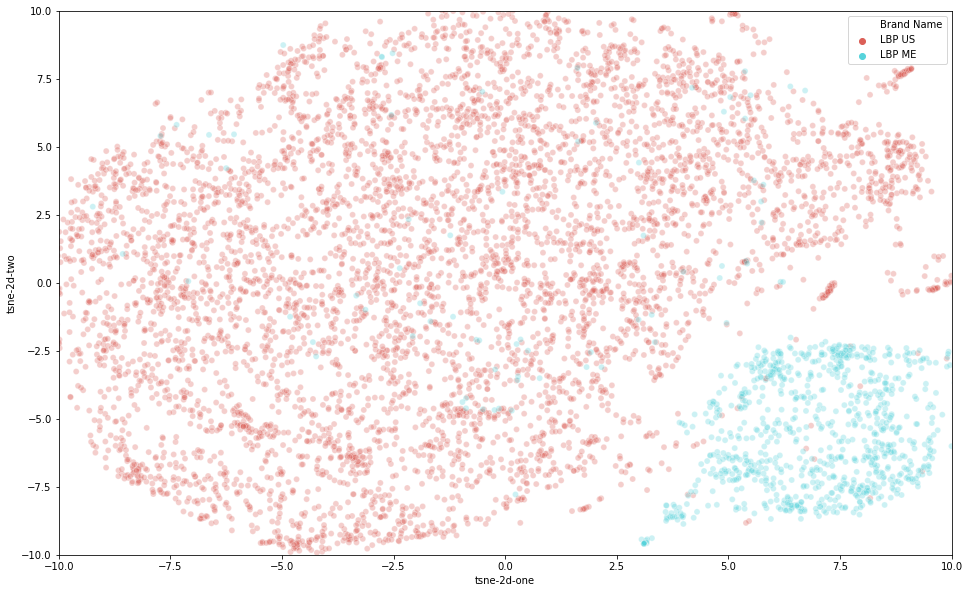

In [64]:
plot_tsne(df=lbp_all,file_name='lbp_tsne',brand_list=['LBP US','LBP ME'])